In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim

In [0]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
  def __init__(self, train=True):
    self.x = torch.arange(-3,3,0.1).view(-1,1)
    self.f = -3 * self.x + 1
    self.y = self.f + 0.1 * torch.randn(self.x.size())
    self.len = self.x.shape[0]

    if train == True:
      self.y[0] = 0
      self.y[50:55] = 20
    else:
      pass
  
  def __getitem__(self,index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return self.len

In [0]:
train_data = Data()
val_data = Data(train=False)

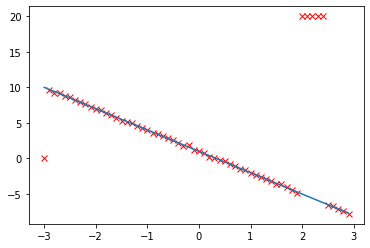

In [17]:
plt.plot(train_data.x.numpy(),train_data.y.numpy(),'xr')
plt.plot(train_data.x.numpy(),train_data.f.numpy())
plt.show()

In [0]:
from torch import nn

class linear_regression(nn.Module):
  def __init__(self,input_size,output_size):
    super(linear_regression,self).__init__()
    self.linear = nn.Linear(input_size,output_size)
  
  def forward(self,x):
    yhat = self.linear(x)
    return yhat

In [0]:
criterion = nn.MSELoss()
trainLoader = DataLoader(dataset=train_data,batch_size=1)

In [0]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS = []

In [0]:
def train_model_with_lr(iter, lr_list):
  for i,lr in enumerate(lr_list):
    model = linear_regression(1,1)
    optimizer = optim.SGD(model.parameters(),lr=lr)
    for epoch in range(iter):
      for x, y in trainLoader:
        yhat = model(x)
        loss = criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    Yhat = model(train_data.x)
    train_loss = criterion(Yhat,train_data.y)
    train_error[i] = train_loss.item()

    Yhat = model(val_data.x)
    val_loss = criterion(Yhat,val_data.y)
    validation_error[i] = val_loss.item()
    MODELS.append(model)

In [0]:
train_model_with_lr(10,learning_rates)

In [0]:
plt.semilogx(np.array(learning_rates),train_error.numpy(),label='training loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(),label='validation loss')
plt.ylabel('Cost')
plt.xlabel('learning rate')
plt.legend()
plt.show()

i [[1.0919777]
 [1.0798784]
 [1.0677792]]
i [[5.840685]
 [5.722953]
 [5.605221]]
i [[6.604759 ]
 [6.470135 ]
 [6.3355107]]
i [[14.668595]
 [14.22701 ]
 [13.785424]]


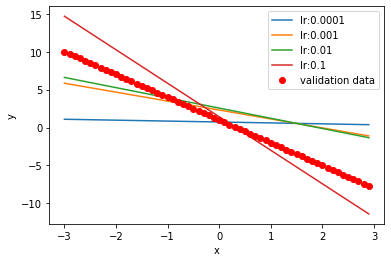

In [24]:
i = 0
for model, learning_rate in zip(MODELS, learning_rates):
  yhat = model(val_data.x)
  plt.plot(val_data.x.numpy(),yhat.detach().numpy(),label='lr:' + str(learning_rate))
  print('i',yhat.detach().numpy()[0:3])

plt.plot(val_data.x.numpy(),val_data.f.numpy(),'or',label='validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [0]:
good_model = MODELS[3]

In [28]:
for x,y in trainLoader:
  yhat = good_model(x)
  print(yhat,y)

tensor([[14.6686]], grad_fn=<AddmmBackward>) tensor([[0.]])
tensor([[14.2270]], grad_fn=<AddmmBackward>) tensor([[9.6575]])
tensor([[13.7854]], grad_fn=<AddmmBackward>) tensor([[9.2556]])
tensor([[13.3438]], grad_fn=<AddmmBackward>) tensor([[9.1738]])
tensor([[12.9023]], grad_fn=<AddmmBackward>) tensor([[8.8051]])
tensor([[12.4607]], grad_fn=<AddmmBackward>) tensor([[8.6878]])
tensor([[12.0191]], grad_fn=<AddmmBackward>) tensor([[8.2397]])
tensor([[11.5775]], grad_fn=<AddmmBackward>) tensor([[7.9940]])
tensor([[11.1359]], grad_fn=<AddmmBackward>) tensor([[7.6521]])
tensor([[10.6943]], grad_fn=<AddmmBackward>) tensor([[7.1903]])
tensor([[10.2527]], grad_fn=<AddmmBackward>) tensor([[7.0229]])
tensor([[9.8112]], grad_fn=<AddmmBackward>) tensor([[6.7614]])
tensor([[9.3696]], grad_fn=<AddmmBackward>) tensor([[6.3491]])
tensor([[8.9280]], grad_fn=<AddmmBackward>) tensor([[6.0921]])
tensor([[8.4864]], grad_fn=<AddmmBackward>) tensor([[5.7376]])
tensor([[8.0448]], grad_fn=<AddmmBackward>) tens